# Marking Attendance using Face Recognition 
In this project we will use python's face_recognition module to recognise faces and then add them into attendance sheet which will be a csv file.

### So let's get started

### Import all the needed modlues

In [3]:
import cv2
import numpy as np
import face_recognition
import os
import matplotlib.pyplot as plt 
%matplotlib inline

In [11]:
# Define a path to access all the images
path="Students Images"

In [12]:
my_student_list=os.listdir(path)

In [13]:
print(my_student_list)

['Bill Gates.jpg', 'Elon Musk.jpg', 'Hritik Roshan.jpg', 'Mark Zukerberg.jpg', 'Steve Jobs.jpg']


### Now let's add all the images in a list and add all the student names inside an another list

In [14]:
stu_images=[]
stu_names=[]

In [16]:
for stu in my_student_list:
    image=cv2.imread(f"{path}/{stu}")
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    stu_images.append(image)
    stu_names.append(os.path.splitext(stu)[0])

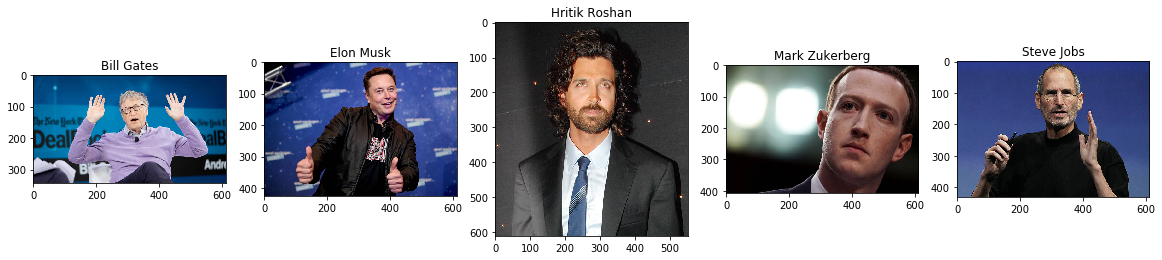

In [28]:
plt.figure(figsize=(20,20))
for i in range(len(stu_names)):
    ax=plt.subplot(1,5,i+1);
    plt.title(stu_names[i])
    plt.axis[]
    plt.imshow(stu_images[i]);
    
    